# This is a collection of Python snippets

## Working with Widgets in Notebooks

https://medium.com/@jdchipox/how-to-interact-with-jupyter-33a98686f24e

### Containers

In [6]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets# defining some widgets
text = widgets.Text(
       value='My Text',
       description='Title', )

calendar = widgets.DatePicker(
           description='Select Date')

slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)

menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')

checkbox = widgets.Checkbox(
           description='Check to invert',)

In [7]:
# You can display any of them by calling the object on a cell
calendar

DatePicker(value=None, description='Select Date')

In [8]:
# Use a container widget to display individual elements together. They can be nested inside the other

box = widgets.VBox([text, slider, menu, calendar, checkbox ])
box

widgets.HBox([box, box])

### A Tabbed container

In [9]:
# A Tab container

# defining a list with the contents of our windows
children = [box, box]# initializing a tab
tab = widgets.Tab()
# setting the tab windows 
tab.children = children# changing the title of the first and second window
tab.set_title(0, 'box')
tab.set_title(1, 'copy of box')

tab

In [10]:
# Inspecting and using values of widgets

# current value of text, checkbox and calendar 
print('Widget text has value {}, of {}'.format(text.value, type(text.value)))

print('Widget checkbox has value {}, of {}'.format(checkbox.value, type(checkbox.value)))

print('Widget calendar has value {}, of {}'.format(calendar.value, type(calendar.value)))

Widget text has value My Text, of <class 'str'>
Widget checkbox has value False, of <class 'bool'>
Widget calendar has value None, of <class 'NoneType'>


### Dataset explorer and printing values

In [ ]:
# Exploring a dataset

import pandas as pd
import math
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
df = pd.read_csv('https://raw.githubusercontent.com/diegopenilla/Some_Data/master/Downloads/trainingData.csv')



# DROPDOWN MENU FOR SELECTING USER-ID
users = widgets.Dropdown(
    options=list(set(df['USERID'])),
    value=1,
    description='USER-ID:',
    disabled=False)

dicti = {} # Initialize dictionary for holding {building(s): floor(s)} for each user.

# Button to display info about user
buttonuser_info = widgets.Button(description='Show Info')
outuser_info = widgets.Output()
def on_buttonuser_info_clicked(b):
    with outuser_info:
        clear_output()
        selection = df[df['USERID']==users.value]
        visited_places = len(set(selection['SPACEID']))
        dicti = {i: 0 for i in list(set(selection['BUILDINGID']))}
        for key, val in dicti.items():
            dicti[key] = list(set(df.loc[(df["USERID"] ==users.value) & (df["BUILDINGID"] == key), "FLOOR"]))
        
        # Extract distance travelled 
        lat = list(selection["LATITUDE"])
        long = list(selection["LONGITUDE"])
        
        # Calculate distance between one point and the next
        total = []
        for latitude, longitude in zip(lat, long):
            total.append((latitude, longitude))
        rez = []
        
        # computing distance as the distance between the coordinates x,y from one point to the next.
        # (we sorted our dataframe by time, and now we are accesing data from a user)
        for i in range(len(total)-1):
            rez.append(math.hypot(total[i+1][0] - total[i][0], total[i+1][1] - total[i][1]))   
        distance_travelled = sum(rez)
        
        # display, the information in Markdown to make it look better.
        display(Markdown('''For User {}, there are ${}$ observations from ${}$ WAP (*Wireless Access Points*)
- Beginning in {} and ending in {}
- Using smartphone {}
- The user travelled {:.2f} $m$ (does not take into account vertical movemement, change of floors)
- Visited places {}
- In {} locations with different SPACEID'''.format(users.value, selection.shape[0], selection.shape[1]-9,         
                                                   str(selection['TIMESTAMP'].min()), str(selection['TIMESTAMP'].max()),
                                                   str(list(set(selection['PHONEID']))[0]), distance_travelled,
                                                   str(dicti),len(set(selection['SPACEID'])))))

# Links button: buttonuser_info to its output function      
buttonuser_info.on_click(on_buttonuser_info_clicked)

# Display
display(widgets.VBox([users,buttonuser_info, outuser_info]))

## Filter a dataframe by value in a column

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# read in the csv file
df = pd.read_csv('pivot_raw_data.csv')

df.head()

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV
0,18/2/18,2018,Feb,LLLDD,AV,TH,Health & Beauty,MP,18853.22964,1243.42604,15.162325,41129
1,28/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,440
2,14/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,17608.25665,1213.82701,14.506397,43215
3,4/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,564
4,21/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,18179.10355,1245.01100,14.601561,44818


In [ ]:
@interact
def show_nmv_more_than(column=['ASP', 'NMV', 'PV', 'Item'], 
                            x=(10, 100000, 20000)):
    return df.loc[df[column] > x]

## Show installed versions/dependencies

In [2]:
pd.__version__

'0.25.2'

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.6.7.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.2
numpy            : 1.17.1
pytz             : 2018.7
dateutil         : 2.7.3
pip              : 19.1.1
setuptools       : 41.4.0
Cython           : 0.29.5
pytest           : 4.0.2
hypothesis       : None
sphinx           : 1.8.4
blosc            : None
feather          : None
xlsxwriter       : 1.1.2
lxml.etree       : 4.2.5
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.6.1
pandas_datareader: None
bs4              : 4.6.3
bottleneck       : None
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.2.5
matplotlib 

## Rename columns

The most flexible method for renaming columns is the `rename()` method. You pass it a dictionary in which the keys are the old names and the values are the new names, and you also specify the axis:

In [5]:
df = df.rename({'col one':'col_one', 'col two':'col_two'}, axis='columns')

The best thing about this method is that you can use it to rename any number of columns, whether it be just one column or all columns.

Now if you're going to rename all of the columns at once, a simpler method is just to overwrite the columns attribute of the DataFrame:

In [ ]:
# df.columns = ['col_one', 'col_two']

## Replace column spaces with underscores, add prefixes

In [12]:
df.columns = df.columns.str.replace(' ', '_')
df.add_prefix('X_')
df.add_suffix('_Y').head()

,Date_of_Week_Y,Year_Y,Month_Y,Channel_Y,Brand_Y,Country_Y,Category_Y,Partnership_Y,NMV_Y,Item_Y,ASP_Y,PV_Y
0,18/2/18,2018,Feb,LLLDD,AV,TH,Health & Beauty,MP,18853.22964,1243.42604,15.162325,41129
1,28/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,440
2,14/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,17608.25665,1213.82701,14.506397,43215
3,4/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,564
4,21/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,18179.10355,1245.01100,14.601561,44818


## Select columns by dtype

In [14]:
df.select_dtypes(include='object').head()

,Date_of_Week,Month,Channel,Brand,Country,Category,Partnership
0,18/2/18,Feb,LLLDD,AV,TH,Health & Beauty,MP
1,28/1/18,Jan,LLLDD,AV,SG,Health & Beauty,MP
2,14/1/18,Jan,LLLDD,AV,TH,Health & Beauty,MP
3,4/2/18,Feb,LLLDD,AV,SG,Health & Beauty,MP
4,21/1/18,Jan,LLLDD,AV,TH,Health & Beauty,MP


In [15]:
df.select_dtypes(include='number').head()

,Year,NMV,Item,ASP,PV
0,2018,18853.22964,1243.42604,15.162325,41129
1,2018,0.00000,0.00000,NaN,440
2,2018,17608.25665,1213.82701,14.506397,43215
3,2018,0.00000,0.00000,NaN,564
4,2018,18179.10355,1245.01100,14.601561,44818


## Select columns by name

In [117]:
df_3col = df[['Year','NMV','Item']]
df_3col.head()

,Year,NMV,Item
0,2018,18853.23,1243.43
1,2018,0.00,0.00
2,2018,17608.26,1213.83
3,2018,0.00,0.00
4,2018,18179.10,1245.01


## Convert strings to numbers

In [17]:
df.astype({'NMV':'float', 'PV':'float'}).dtypes

Date_of_Week     object
Year              int64
Month            object
Channel          object
Brand            object
Country          object
Category         object
Partnership      object
NMV             float64
Item            float64
ASP             float64
PV              float64
dtype: object

However, this would have resulted in an error if you tried to use it on the third column, because that column contains a dash to represent zero and pandas doesn't understand how to handle it.

Instead, you can use the `to_numeric()` function on the third column and tell it to convert any invalid input into `NaN` values:

In [16]:
pd.to_numeric(df.ASP, errors='coerce')

0       15.162325
1             NaN
2       14.506397
3             NaN
4       14.601561
5       17.776520
6             NaN
7             NaN
8       15.509837
9             NaN
10            NaN
11      15.281041
12      15.226416
13      14.722315
14      14.486268
15      12.503173
16            NaN
17      12.503173
18      12.503173
19            NaN
20            NaN
21      15.561198
22      14.714657
23      15.185031
24      14.945724
25      14.343283
26       1.993718
27       2.733806
28       1.713752
29       3.289496
          ...    
3046     1.140962
3047          NaN
3048          NaN
3049     5.913965
3050     1.798230
3051     1.706737
3052     1.433179
3053     1.235222
3054     1.738556
3055     1.794630
3056     1.433179
3057     1.696422
3058     1.232084
3059     1.717870
3060     1.870599
3061     1.433179
3062     1.433179
3063     1.266001
3064     1.430012
3065     1.499932
3066     1.626143
3067     1.455844
3068     1.707713
3069     1.119830
3070     1

In [18]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df.head()

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV
0,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,18853.22964,1243.42604,15.162325,41129
1,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,440
2,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,17608.25665,1213.82701,14.506397,43215
3,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,564
4,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,18179.10355,1245.01100,14.601561,44818


## Dataframe Memory Usage Checking and Reducing Dataframe Size

In [19]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 12 columns):
Date_of_Week    3076 non-null float64
Year            3076 non-null int64
Month           3076 non-null float64
Channel         3076 non-null float64
Brand           3076 non-null float64
Country         3076 non-null float64
Category        3076 non-null float64
Partnership     3076 non-null float64
NMV             3076 non-null float64
Item            3076 non-null float64
ASP             3076 non-null float64
PV              3076 non-null int64
dtypes: float64(10), int64(2)
memory usage: 288.5 KB


In [ ]:
df_name = pd.DataFrame()

This will set the dataframe to a blank one

The first step to reduce size is to only read in the columns that you actually need, which we specify with the "usecols" parameter:

In [20]:
cols = ['Country', 'NMV']
small_df = pd.read_csv('pivot_raw_data.csv', usecols=cols)
small_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 2 columns):
Country    3076 non-null object
NMV        3076 non-null float64
dtypes: float64(1), object(1)
memory usage: 201.3 KB


The second step is to convert any object columns containing categorical data to the category data type, which we specify with the "dtype" parameter:

In [21]:
dtypes = {'Country':'category'}
smaller_df = pd.read_csv('pivot_raw_data.csv', usecols=cols, dtype=dtypes)
smaller_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 2 columns):
Country    3076 non-null category
NMV        3076 non-null float64
dtypes: category(1), float64(1)
memory usage: 27.6 KB


## Filter a DataFrame by multiple categories & Regex

In [4]:
filter_df = pd.read_csv('pivot_raw_data.csv')
filter_df.head()

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV
0,18/2/18,2018,Feb,LLLDD,AV,TH,Health & Beauty,MP,18853.22964,1243.42604,15.162325,41129
1,28/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,440
2,14/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,17608.25665,1213.82701,14.506397,43215
3,4/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,564
4,21/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,18179.10355,1245.01100,14.601561,44818


In [86]:
# tilde means "NOT"

filter_df[filter_df.Country.str.match("TH|SG") & # or Country.isin(['TH', 'SG'])
         filter_df.Month.isin(['Jan']) &
         ~filter_df.Category.isin(['Health & Beauty'])].head()

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV
229,7/1/18,2018,Jan,LLLDD,BRZ,TH,Groceries,RT,33834.22,13137.95,2.58,144189
239,21/1/18,2018,Jan,LLLDD,BRZ,SG,Groceries,RT,4205.63,1056.87,3.98,8589
250,14/1/18,2018,Jan,LLLDD,BRZ,TH,Groceries,RT,18628.26,6911.64,2.70,101351
256,28/1/18,2018,Jan,LLLDD,BRZ,SG,Groceries,MP,0.00,0.00,nan,8
260,7/1/18,2018,Jan,LLLDD,BRZ,SG,Groceries,MP,0.00,0.00,nan,8


In [90]:
filter_df.query("Country.str.contains('SG|TH') and Year == 2018 and Category != 'Health & Beauty'", engine = 'python')

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV
229,7/1/18,2018,Jan,LLLDD,BRZ,TH,Groceries,RT,33834.22,13137.95,2.58,144189
230,25/3/18,2018,Mar,LLLDD,BRZ,TH,Groceries,RT,42516.79,11306.34,3.76,189056
231,18/3/18,2018,Mar,LLLDD,BRZ,SG,Groceries,RT,4962.37,1186.67,4.18,8803
233,11/2/18,2018,Feb,LLLDD,BRZ,SG,Groceries,MP,0.00,0.00,nan,0
237,4/2/18,2018,Feb,LLLDD,BRZ,SG,Groceries,RT,4329.09,1078.94,4.01,8887
239,21/1/18,2018,Jan,LLLDD,BRZ,SG,Groceries,RT,4205.63,1056.87,3.98,8589
243,4/3/18,2018,Mar,LLLDD,BRZ,TH,Groceries,RT,31136.85,9469.68,3.29,0
246,18/2/18,2018,Feb,LLLDD,BRZ,TH,Groceries,RT,26908.73,8534.29,3.15,123791
247,4/3/18,2018,Mar,LLLDD,BRZ,SG,Groceries,RT,4696.21,1126.18,4.17,8513
248,11/2/18,2018,Feb,LLLDD,BRZ,SG,Groceries,RT,4370.45,1083.86,4.03,9017


## Percent change

In [ ]:
# dataFrame.pct_change() #column wise
# dataFrame.pct_change(axis=1) #row wise

## Expand/Parse a Series of lists into a DataFrame

In [32]:
df1 = pd.DataFrame({'col_one':['a', 'b', 'c'], 'col_two':[[10, 40], [20, 50], [30, 60]]})
df1

,col_one,col_two
0,a,"[10, 40]"
1,b,"[20, 50]"
2,c,"[30, 60]"


If we wanted to expand the second column into its own DataFrame, we can use the `apply()` method on that column and pass it the Series constructor:

In [33]:
df_new = df1.col_two.apply(pd.Series)
df_new

,0,1
0,10,40
1,20,50
2,30,60


And by using the `concat()` function, you can combine the original DataFrame with the new DataFrame:

In [34]:
pd.concat([df1, df_new], axis='columns')

,col_one,col_two,0,1
0,a,"[10, 40]",10,40
1,b,"[20, 50]",20,50
2,c,"[30, 60]",30,60


## Groupby and Aggregation, count distinct

In [40]:
cr_distinct_brand = filter_df.groupby(['Country', 'Category']).agg(
    brand_count_distinct=pd.NamedAgg(column='Brand', aggfunc='nunique'), 
    brand_count=pd.NamedAgg(column='Brand', aggfunc='count'),
    NMV = pd.NamedAgg(column = 'NMV', aggfunc='sum')
)


cr_distinct_brand

brand_count_distinct  brand_count           NMV
Country Category                                                           
ID      Groceries                             16          348  3.272923e+05
        Health & Beauty                       18          411  9.364347e+06
        Home Appliances                        1           14  1.662065e+06
        Laundry & Cleaning                     1            8  1.735826e+02
        Mother & Baby                          1           26  2.779175e+05
        Others                                 1            1  3.766143e+02
MY      Groceries                             10          237  2.260770e+06
        Health & Beauty                       14          292  1.173772e+06
PH      Groceries                              7          138  5.669593e+05
        Health & Beauty                       17          364  7.403351e+06
        Home & Living                          1            1  6.279454e+04
        Home Appliances                        1           12  3.797883e+05
        Kitchen & Dining                       1           24  3.856945e+05
        Mother & Baby                          2           15  1.286837e+04
        Others                                 1            1  2.408520e+01
SG      Cameras                                1            1  0.000000e+00
        Groceries                              4          102  1.487909e+05
        Health & Beauty                       16          373  3.525203e+05
TH      Groceries                              4           48  9.906163e+05
        Health & Beauty                       14          219  7.403251e+06
        Others                                10           10  5.738706e+03
        Uncategorized                          1            1  0.000000e+00
VN      Groceries                              8          166  2.837518e+06
        Health & Beauty                       17          245  4.670674e+06
        Home Appliances                        1           12  2.034727e+05
        Others                                 7            7  0.000000e+00

## Method Chaining 

In [69]:
cr_piped = cr_distinct_brand[['NMV', 'brand_count_distinct']]

(cr_piped.rename({'NMV':'net_mkt_value', 'brand_count_distinct': 'brand_cd'}, axis='columns')
         .assign(Organisation = 'UL')
         .assign(Vertical = lambda cr_piped: np.where((cr_piped['Organisation'].str.contains("UL")), 'FMCG', 'null'))
         .query('Country.str.match("TH|SG")')
         .style.format({'NMV':'${:.2f}'})
)

In [ ]:
cr = filter_df.groupby(['Month', 'Brand', 'Country']).agg({'NMV': ['sum'], 'Item': ['sum'], 'PV': ['sum']})
cr.head()

## Reshape and Unstack, Pivoting

In [50]:
cr1 = cr.unstack(1)
cr1.columns = ['_'.join(tup).rstrip('_') for tup in cr1.columns.values]
cr1.head()

NMV_sum_AV  NMV_sum_BB   NMV_sum_BE   NMV_sum_BO  NMV_sum_BRZ  \
Month Country                                                                   
Apr   ID               NaN         NaN          NaN  1090.647638          NaN   
      MY               NaN         NaN          NaN          NaN          NaN   
      PH               NaN         NaN          NaN          NaN          NaN   
      SG               NaN         NaN          NaN          NaN          NaN   
      TH       56377.25549         NaN  20552.83004          NaN          NaN   

               NMV_sum_CF  NMV_sum_CLR  NMV_sum_CP    NMV_sum_CR   NMV_sum_CS  \
Month Country                                                                   
Apr   ID              NaN  6316.550178  397.206315   2332.193543          NaN   
      MY              NaN          NaN         NaN           NaN          NaN   
      PH              NaN  1063.649505         NaN           NaN  11438.80857   
      SG              NaN   664.569658         NaN           NaN          NaN   
      TH              NaN  5594.322339         NaN  16880.230530          NaN   

               ...  PV_sum_TG  PV_sum_TSM  PV_sum_VIM  PV_sum_VLE  PV_sum_VSM  \
Month Country  ...                                                              
Apr   ID       ...        NaN    404862.0         NaN    424457.0     33754.0   
      MY       ...        NaN         NaN         NaN     77159.0         NaN   
      PH       ...   115808.0    843483.0         NaN    164533.0      1508.0   
      SG       ...     2904.0      5315.0         NaN      1372.0         NaN   
      TH       ...     6398.0    256148.0         NaN    844839.0         NaN   

               PV_sum_VXL  PV_sum_WIP  PV_sum_WLL  PV_sum_XXA  PV_sum_ZWL  
Month Country                                                              
Apr   ID              NaN         NaN         NaN    457965.0         NaN  
      MY              NaN         NaN         NaN       228.0         NaN  
      PH              NaN         NaN         NaN     67676.0         NaN  
      SG              NaN         NaN         NaN       534.0         NaN  
      TH              NaN         NaN         NaN      8359.0         NaN  

[5 rows x 159 columns]

In [56]:
filter_df_pivot = filter_df.pivot_table(index=['Month', 'Brand', 'Country'], 
                      # columns = [],
                      values=['NMV', 'PV'], aggfunc='sum',
                      margins=True)

filter_df_pivot.head(20)

NMV      PV
Month Brand Country                      
Apr   AV    TH       56377.255490   90397
      BE    TH       20552.830040   17637
      BO    ID        1090.647638    4944
      CF    VN         134.713515    4953
      CLR   ID        6316.550178   66176
            PH        1063.649505   48358
            SG         664.569658    3872
            TH        5594.322339   25832
            VN        6281.747282  183277
      CP    ID         397.206315    6696
            VN        3066.710180   18243
      CR    ID        2332.193543   65753
            TH       16880.230530  147993
      CS    PH       11438.808570  115730
      CT    MY        1562.667003   16689
            VN       20634.157950  204402
      DV    ID       31165.616480  545589
            MY        9968.307229   73449
            PH       71310.412740  618269
            SG        4229.827908   18558

In [68]:
filter_df_unpivot = filter_df_pivot.stack()
filter_df_unpivot.head()

Month  Brand  Country     
Apr    AV     TH       NMV    56377.255490
                       PV     90397.000000
       BE     TH       NMV    20552.830040
                       PV     17637.000000
       BO     ID       NMV     1090.647638
dtype: float64

## Display numbers not by scientific notation but by decimal places 

In [69]:
pd.set_option('display.float_format', '{:.2f}'.format)

We can create a dictionary of format strings that specifies how each column should be formatted:

In [82]:
format_dict = {'Date':'{:%m/%d/%y}', 'NMV':'${:.2f}', 'ASP':'{:,}'}

In [83]:
filter_df.head().style.format(format_dict)

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV
0,18/2/18,2018,Feb,LLLDD,AV,TH,Health & Beauty,MP,$18853.23,1243.43,15.16232492,41129
1,28/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,$0.00,0,nan,440
2,14/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,$17608.26,1213.83,14.50639713,43215
3,4/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,$0.00,0,nan,564
4,21/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,$18179.10,1245.01,14.60156059,44818


## Common Date / Time Formats (GA)

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

https://stackoverflow.com/questions/52730806/how-to-convert-utc-timestamp-string-to-pandas-datetime

https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

https://stackabuse.com/how-to-format-dates-in-python/

In [16]:
t = pd.DataFrame([('20190527', '18/2/18', '2018-05-21', '2019-02-23 11:19:50', '1553203835'),
                  ('20190527', '28/1/18', '2019-05-20', '2019-02-23 11:19:50', '1554198631')], 
                 columns = ['date', 'date_slash', 'date_dash', 'timestamp', 'unix_timestamp']) 
t['DateTime_yyyymmdd'] = pd.to_datetime(t['date'].astype(str), format='%Y%m%d')
t['DateTime_yyyymmdd_timezone'] = pd.to_datetime(t['date'].astype(str), format='%Y%m%d').dt.tz_localize("GMT").dt.tz_convert('Asia/Jakarta')
t['DateTime_slashformat'] = pd.to_datetime(t['date_slash'].astype(str), format='%d/%m/%y')
t['DateTime_dashformat'] = pd.to_datetime(t['date_dash'].astype(str), format='%Y-%m-%d')
t['DateTime_posixct'] = pd.to_datetime(t['timestamp'].astype(str), format='%Y-%m-%d %I:%M:%S')
t['DateTime_unix'] = pd.to_datetime(t['unix_timestamp'].astype(float), unit = 's')
t

,date,date_slash,date_dash,timestamp,unix_timestamp,DateTime_yyyymmdd,DateTime_yyyymmdd_timezone,DateTime_slashformat,DateTime_dashformat,DateTime_posixct,DateTime_unix
0,20190527,18/2/18,2018-05-21,2019-02-23 11:19:50,1553203835,2019-05-27,2019-05-27 07:00:00+07:00,2018-02-18,2018-05-21,2019-02-23 11:19:50,2019-03-21 21:30:35
1,20190527,28/1/18,2019-05-20,2019-02-23 11:19:50,1554198631,2019-05-27,2019-05-27 07:00:00+07:00,2018-01-28,2019-05-20,2019-02-23 11:19:50,2019-04-02 09:50:31


In [32]:
tz = pd.DataFrame([('2019-01-04T16:41:24+0200', '2007-03-04T21:08:12Z'),
                  ('2019-01-04T16:41:24+0200', '2007-03-04T21:08:12Z')], 
                 columns = ['date_ios8601', 'date_ios8601_zulu'])
tz['DateTime_8601'] = pd.to_datetime(tz['date_ios8601'].astype(str), format='%Y-%m-%dT%H:%M:%S%z')
tz['DateTime_8601_zulu'] = pd.to_datetime(tz['date_ios8601_zulu'].astype(str), format='%Y-%m-%dT%H:%M:%S%z')
tz

,date_ios8601,date_ios8601_zulu,DateTime_8601,DateTime_8601_zulu
0,2019-01-04T16:41:24+0200,2007-03-04T21:08:12Z,2019-01-04 16:41:24+02:00,2007-03-04 21:08:12+00:00
1,2019-01-04T16:41:24+0200,2007-03-04T21:08:12Z,2019-01-04 16:41:24+02:00,2007-03-04 21:08:12+00:00


## List of timezones

In [41]:
from pytz import all_timezones

# Show ten time zones
all_timezones[290:320]

['Asia/Manila',
 'Asia/Muscat',
 'Asia/Nicosia',
 'Asia/Novokuznetsk',
 'Asia/Novosibirsk',
 'Asia/Omsk',
 'Asia/Oral',
 'Asia/Phnom_Penh',
 'Asia/Pontianak',
 'Asia/Pyongyang',
 'Asia/Qatar',
 'Asia/Qyzylorda',
 'Asia/Rangoon',
 'Asia/Riyadh',
 'Asia/Saigon',
 'Asia/Sakhalin',
 'Asia/Samarkand',
 'Asia/Seoul',
 'Asia/Shanghai',
 'Asia/Singapore',
 'Asia/Srednekolymsk',
 'Asia/Taipei',
 'Asia/Tashkent',
 'Asia/Tbilisi',
 'Asia/Tehran',
 'Asia/Tel_Aviv',
 'Asia/Thimbu',
 'Asia/Thimphu',
 'Asia/Tokyo',
 'Asia/Tomsk']

## Create new column using conditions / case when

The below conditions will execute sequentially so take note of order

In [143]:
filter_df['Region'] = np.where((filter_df['Country'].str.contains("SG|TH")) & 
                               (filter_df['Month'] == 'Jan'), 'ASEAN-Q1', filter_df['Country'])
filter_df['Region'] = np.where((filter_df['Country'].str.contains("SG|TH")) & 
                               (filter_df['Month'] == 'Feb'), 'ASEAN-Q2', filter_df['Region'])


filter_df.head(50)

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV,Region
0,18/2/18,2018,Feb,LLLDD,AV,TH,Health & Beauty,MP,18853.23,1243.43,15.16,41129,ASEAN-Q2
1,28/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00,0.00,nan,440,ASEAN-Q1
2,14/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,17608.26,1213.83,14.51,43215,ASEAN-Q1
3,4/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,0.00,0.00,nan,564,ASEAN-Q2
4,21/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,18179.10,1245.01,14.60,44818,ASEAN-Q1
5,2/4/17,2017,Apr,LLLDD,AV,TH,Health & Beauty,MP,56377.26,3171.45,17.78,90397,TH
6,21/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00,0.00,nan,392,ASEAN-Q1
7,11/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,0.00,0.00,nan,600,ASEAN-Q2
8,18/3/18,2018,Mar,LLLDD,AV,TH,Health & Beauty,MP,17641.14,1137.42,15.51,37370,TH
9,14/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00,0.00,nan,429,ASEAN-Q1


## Plotting - Pandas

In [130]:
import plotly
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [70]:
filter_df.head()

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV
0,18/2/18,2018,Feb,LLLDD,AV,TH,Health & Beauty,MP,18853.22964,1243.42604,15.162325,41129
1,28/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,440
2,14/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,17608.25665,1213.82701,14.506397,43215
3,4/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,564
4,21/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,18179.10355,1245.01100,14.601561,44818


### Horizontal barchart

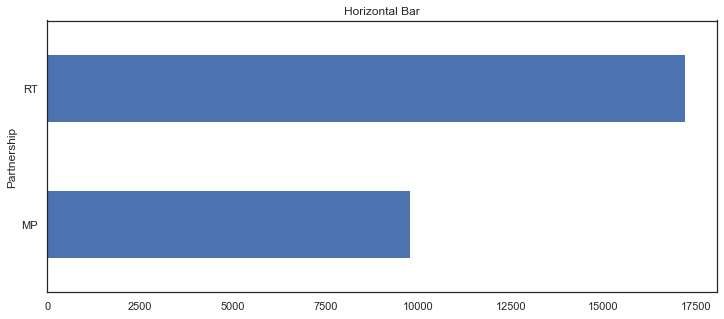

In [71]:
filter_df[filter_df['Year'] == 2018].groupby('Partnership')['NMV'].mean().sort_values().plot(kind='barh',
                                                                                             figsize=(12,5),
                                                                                            title = ("Horizontal Bar"))

### Barchart

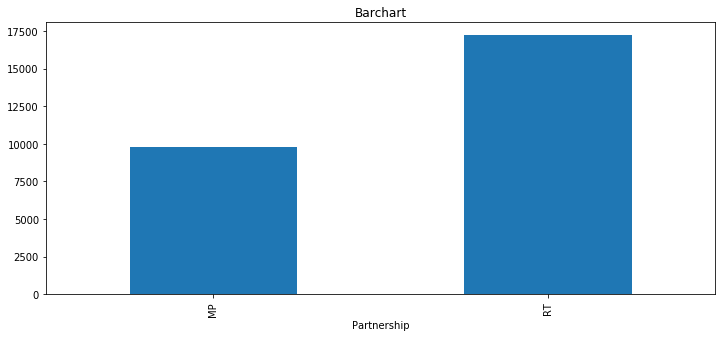

In [18]:
filter_df[filter_df['Year'] == 2018].groupby('Partnership')['NMV'].mean().sort_values().plot(kind='bar',
                                                                                             figsize=(12,5),
                                                                                            title =('Barchart'))

### Boxplot

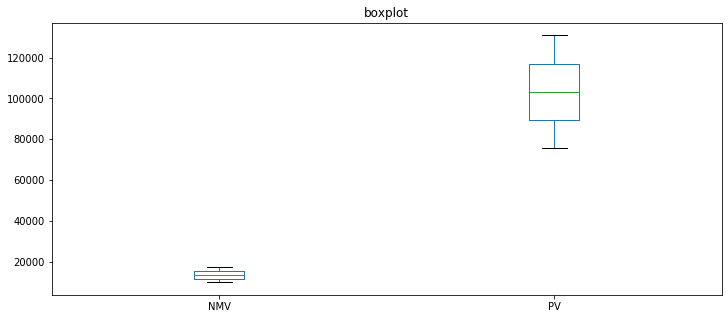

In [24]:
filter_df[filter_df['Year'] == 2018].groupby('Partnership')[('NMV', 'PV')].mean().plot(kind='box',
                                                                                             figsize=(12,5),
                                                                                            title =('boxplot'))

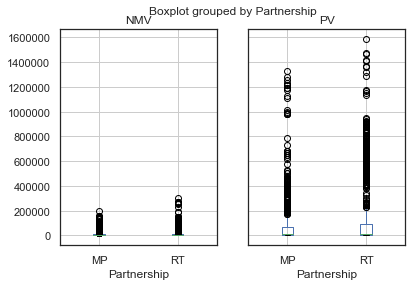

In [154]:
import matplotlib.pyplot as plt

a = filter_df[filter_df['Year'] == 2018]
a = a[['Partnership', 'NMV', 'PV']]
a.dtypes
plt = a.boxplot(['NMV','PV'], 'Partnership')

### Scatterplot - using seaborn is better

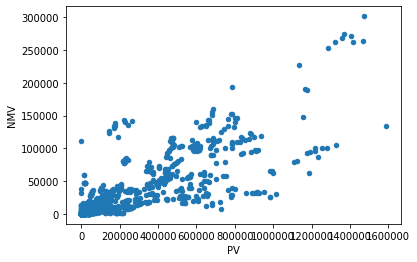

In [36]:
scatterdf = filter_df[filter_df['Year'] == 2018]
scatterdf[['Brand', 'NMV', 'PV']].plot(kind='scatter', 
                                       x='PV', 
                                       y='NMV')

### Pie Chart

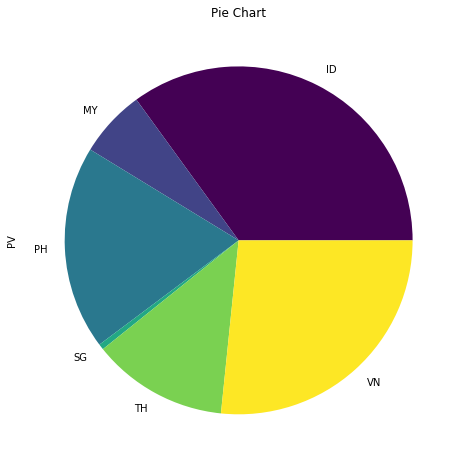

In [41]:
filter_df[filter_df['Year'] == 2018].groupby(['Country'])['PV'].sum().plot(
    kind='pie',
    figsize=(12,8),
    cmap="viridis", # defaults to orangish,
    title = 'Pie Chart'
)

### Stacked area chart

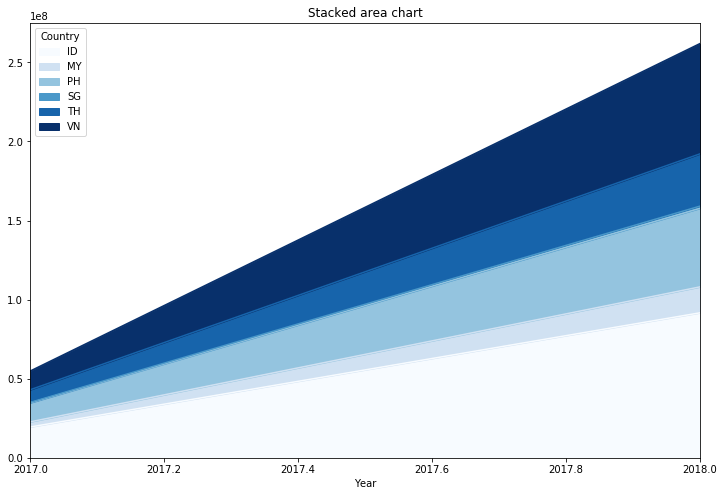

In [45]:
filter_df.groupby(['Year','Country'])['PV'].sum().unstack().plot(
    kind='area',
    figsize=(12,8),
    cmap="Blues", # defaults to orangish
    title = 'Stacked area chart'
)

### Exporting

You can easily change format (png, pdf, eps …) and resolution of your plot by adjusting the appropriate arguments

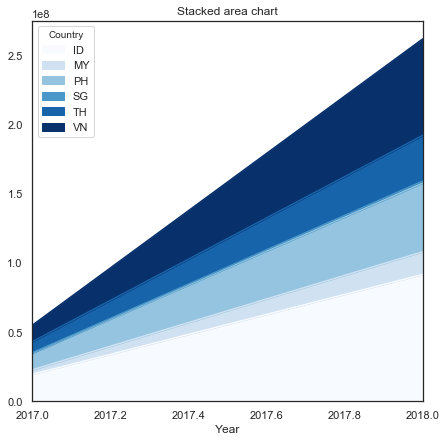

In [79]:
fig = filter_df.groupby(['Year','Country'])['PV'].sum().unstack().plot(
    kind='area',
    figsize=(12,8),
    cmap="Blues", # defaults to orangish
    title = 'Stacked area chart')
fig.get_figure().set_size_inches(7,7) # set width and height
fig.get_figure().savefig('my_first_plot.png',dpi = 240)

## Plotting - Seaborn

In [47]:
import plotly
import seaborn as sns
import matplotlib
%matplotlib inline

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white" # nicer layout
)

In [49]:
filter_df.head()

,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV
0,18/2/18,2018,Feb,LLLDD,AV,TH,Health & Beauty,MP,18853.22964,1243.42604,15.162325,41129
1,28/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,440
2,14/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,17608.25665,1213.82701,14.506397,43215
3,4/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,564
4,21/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,18179.10355,1245.01100,14.601561,44818


### Distribution Plot

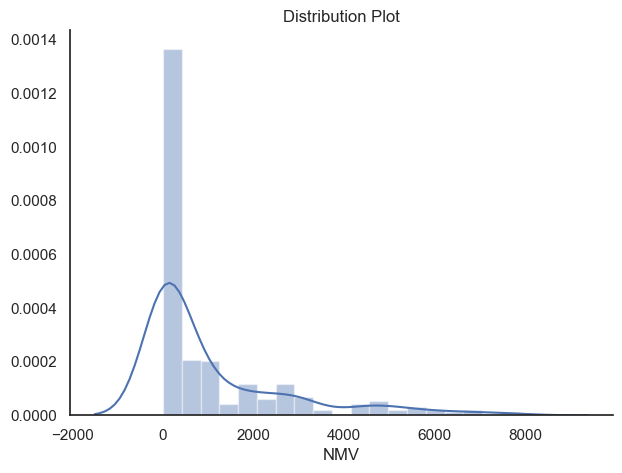

In [58]:
sns_data = filter_df[(filter_df['Year'] == 2018) & (filter_df['Country'] == 'SG')]

sns.distplot(sns_data['NMV'], label = 'NMV').set_title("Distribution Plot")
sns.despine()

### Scatterplot

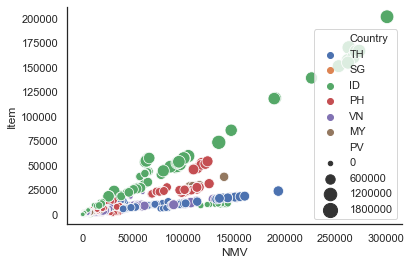

In [233]:
sns.scatterplot(
    x='NMV',
    y='Item',
    data=filter_df[filter_df['Year'] == 2018],
    size = 'PV',
    sizes=(20, 200), 
    # palette=cmap,
    hue='Country'
)# both, hue and size are optional

sns.despine() # prettier layout

### Boxplot

In [230]:
b = filter_df[(filter_df['Year'] == 2018) & (filter_df['Country'].str.match("TH|SG"))]
b = b[['Partnership', 'Country', 'NMV', 'PV']]
b = b.melt(id_vars=['Partnership', 'Country'], var_name='Metric', value_name='Value')
b.head()

,Partnership,Country,Metric,Value
0,MP,TH,NMV,18853.22964
1,MP,SG,NMV,0.00000
2,MP,TH,NMV,17608.25665
3,MP,SG,NMV,0.00000
4,MP,TH,NMV,18179.10355


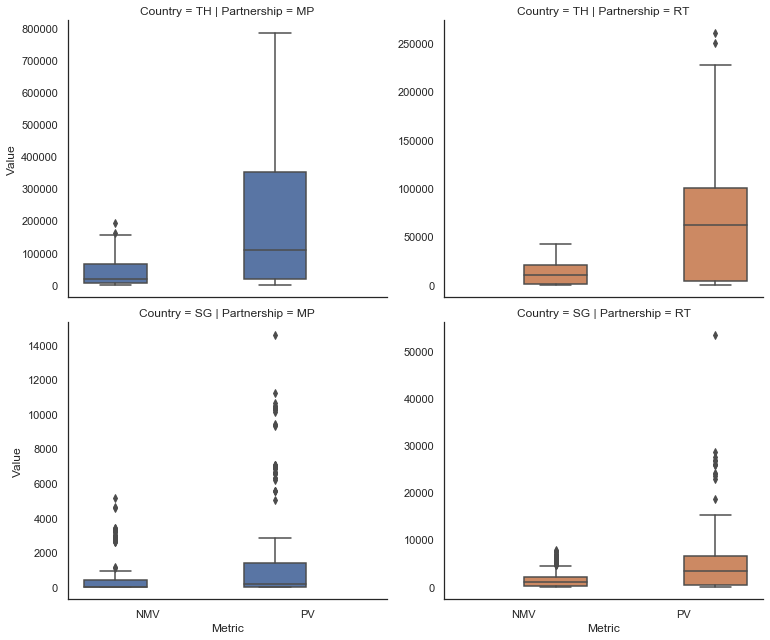

In [232]:
g = sns.catplot(x="Metric", 
                y="Value",
                hue="Partnership", 
                col="Partnership",
                row = "Country",
                data=b, 
                kind="box",
                height=4.5, 
                aspect=1.2,
                sharey=False)

g.despine() # prettier layout

### Violin plot

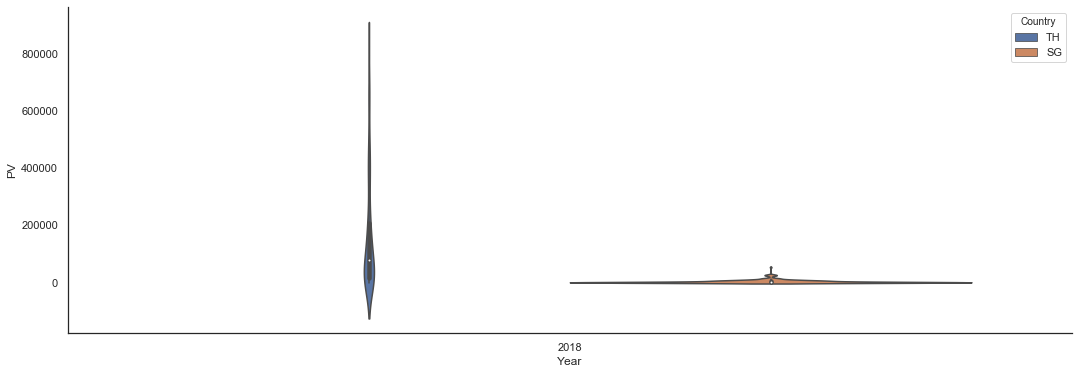

In [243]:
sns.violinplot(
    x='Year',
    y='PV',
    hue='Country',
    data=filter_df[(filter_df['Year'] == 2018) & (filter_df['Country'].isin(['SG', 'TH']))]
)

sns.despine()

### Pairplot

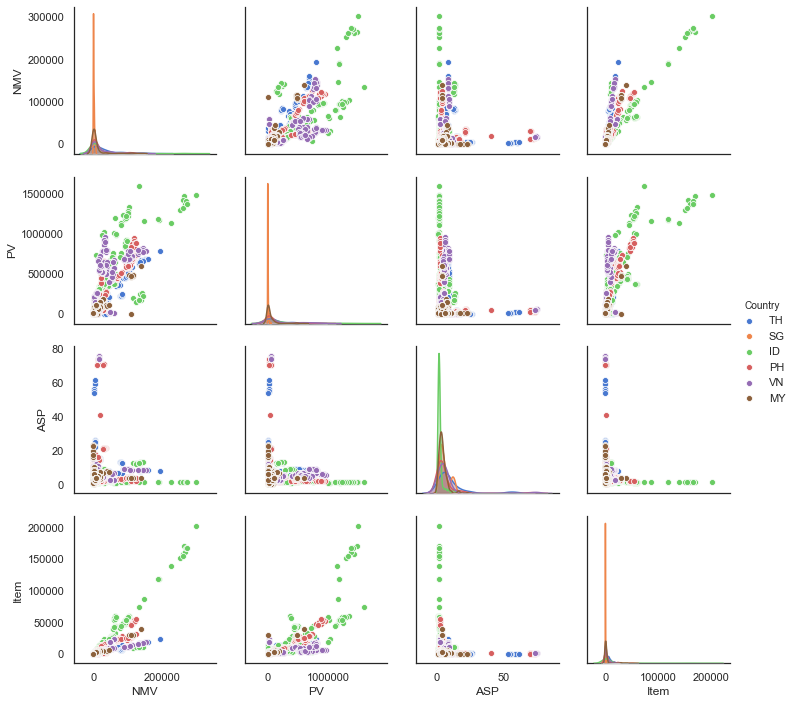

In [245]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)

sns.pairplot(
    filter_df[(filter_df['Year'] == 2018)][[
        'NMV', 'PV', 'ASP', 'Item', 'Country'
    ]].dropna(), 
    hue='Country'
)

### Facet Grid

In [271]:
date_df = filter_df[(filter_df['Year'] == 2018)]
date_df['formatted_date'] = pd.to_datetime(date_df['Date_of_Week'].astype(str), format='%d/%m/%y')
date_df.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Date_of_Week,Year,Month,Channel,Brand,Country,Category,Partnership,NMV,Item,ASP,PV,formatted_date
0,18/2/18,2018,Feb,LLLDD,AV,TH,Health & Beauty,MP,18853.22964,1243.42604,15.162325,41129,2018-02-18
1,28/1/18,2018,Jan,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,440,2018-01-28
2,14/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,17608.25665,1213.82701,14.506397,43215,2018-01-14
3,4/2/18,2018,Feb,LLLDD,AV,SG,Health & Beauty,MP,0.00000,0.00000,NaN,564,2018-02-04
4,21/1/18,2018,Jan,LLLDD,AV,TH,Health & Beauty,MP,18179.10355,1245.01100,14.601561,44818,2018-01-21


#### Line Chart

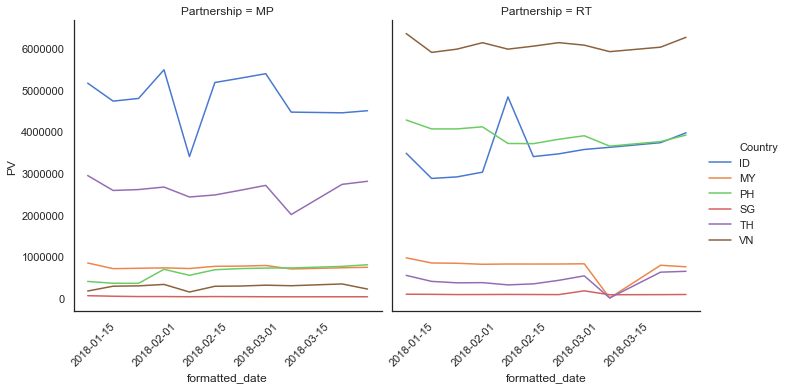

In [283]:
import matplotlib.pyplot as plt
%matplotlib inline


fig = sns.relplot(x="formatted_date", 
            y="PV",
            hue="Country",  
            col="Partnership",
            height=5, 
            aspect=1, 
            facet_kws=dict(sharex=False),
            kind="line", 
            legend="full", 
            data=date_df.groupby(['Country', 'Partnership', 'formatted_date'])['PV'].sum().reset_index())

fig.set_xticklabels( rotation=45, ha='right')

#### Histogram

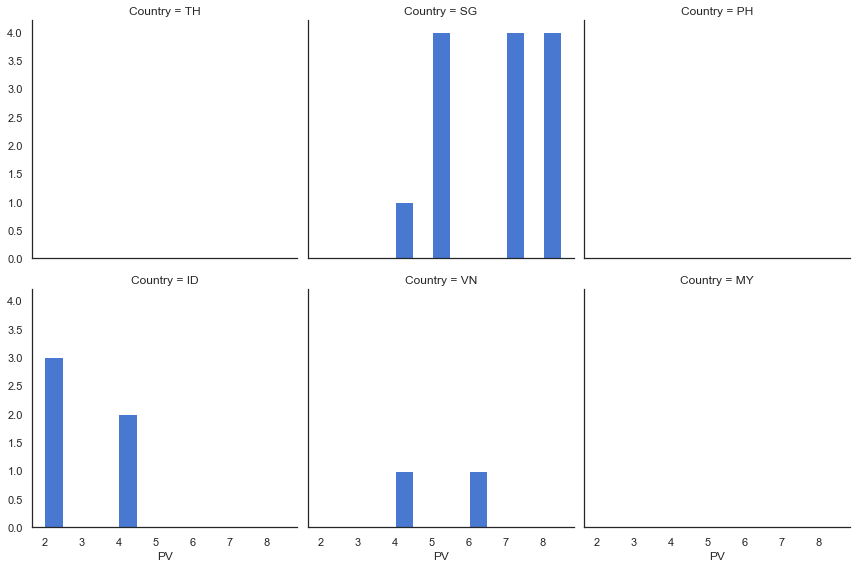

In [288]:
bar_df = filter_df[['Country', 'PV']]
g = sns.FacetGrid(bar_df,
                  col="Country", 
                  col_wrap=3,
                  height=4)
g = (g.map(plt.hist, "PV",bins=np.arange(2,9,0.5)))

#### Annotated KDE (kernel density estimate) plot

https://towardsdatascience.com/plotting-with-python-c2561b8c0f1f

## Plotting - Plotly

In [89]:
import plotly.express as px

fig = px.scatter(
    data_frame=filter_df[filter_df['Year'] == 2018], 
    x="NMV", 
    y="PV", 
    size="Item", 
    color="Category",
    facet_col = "Country",
    hover_name="Brand",
    size_max=60
)

fig.show()